In [8]:
import os

# Define datasets, experiment names, and expected filenames
datasets = ["mobiact_realworld"]
experiment_names = ["Df", "Syn", "Df_Syn", "FS_Dpfs", "FS_Df_Dpfs", "FS_Syn", "FS_Df_Syn", "FS_Syn_Dpfs", "FS_Df_Syn_Dpfs", "FS_Df_plus_Dpfs", "FS_Df_plus_Syn", "Dp"]
experiment_names = ["Df", "Df_aug", "Df_rot", "Syn", "Syn_aug", "Df_Syn", "Df_plus_Syn", "Dp"]
required_files = [f"{dataset}_{experiment}.csv" for dataset in datasets for experiment in experiment_names]

# Directory containing the result files
results_dir = "results_wal"

# Check for missing files
missing_files = [file for file in required_files if not os.path.isfile(os.path.join(results_dir, file))]

# Print results
if missing_files:
    print("The following files are missing:")
    for file in missing_files:
        print(file)
else:
    print("All required files are present.")


The following files are missing:
mobiact_realworld_Df_rot.csv


In [9]:
import os
import pandas as pd

def create_summary_csv(dataset, results_dir="results"):
    
    # Dictionary to store data for each source across experiments and modes
    data_acc = {}
    data_loss = {}
    data_f1 = {}
    
    for experiment in experiment_names:
        file_path = os.path.join(results_dir, f"{dataset}_{experiment}.csv")
        if os.path.isfile(file_path):
            # Read the file and extract source, mode, and accuracy columns
            df = pd.read_csv(file_path)
            # Group by 'source', then compute the average accuracy for each combination
            avg_accuracy = df.groupby(['source'])['accuracy'].mean()
            avg_loss = df.groupby(['source'])['loss'].mean()
            avg_f1 = df.groupby(['source'])['f1'].mean()
            # Store results in dictionary
            data_acc[experiment] = round(avg_accuracy, 4)
            data_loss[experiment] = round(avg_loss, 4)
            data_f1[experiment] = round(avg_f1, 4)
        else:
            print(f"Warning: {file_path} does not exist and will be skipped.")
    
    # Combine all data into a single DataFrame
    summary_acc = pd.concat(data_acc.values(), axis=1, keys=data_acc.keys())
    summary_loss = pd.concat(data_loss.values(), axis=1, keys=data_loss.keys())
    summary_f1 = pd.concat(data_f1.values(), axis=1, keys=data_f1.keys())
    
    # # Save the result to a new CSV file
    # output_file = os.path.join(results_dir, f"{dataset}_results.csv")
    # summary_df.to_csv(output_file)
    # print(f"Summary CSV file saved as: {output_file}")

    print(summary_acc)
    print()
    print(summary_loss)
    print()
    print(summary_f1)

# Usage example
create_summary_csv("mobiact_realworld", results_dir)


            Df  Df_aug     Syn  Syn_aug  Df_Syn  Df_plus_Syn      Dp
source                                                              
WAL     0.5115  0.5758  0.5706   0.3474  0.7117       0.4536  0.9709

            Df  Df_aug     Syn  Syn_aug  Df_Syn  Df_plus_Syn      Dp
source                                                              
WAL     2.9721  2.3295  3.2926   8.7471  1.2118       3.1512  0.0947

            Df  Df_aug    Syn  Syn_aug  Df_Syn  Df_plus_Syn      Dp
source                                                             
WAL     0.4559   0.529  0.503   0.1927  0.6999       0.4115  0.9709


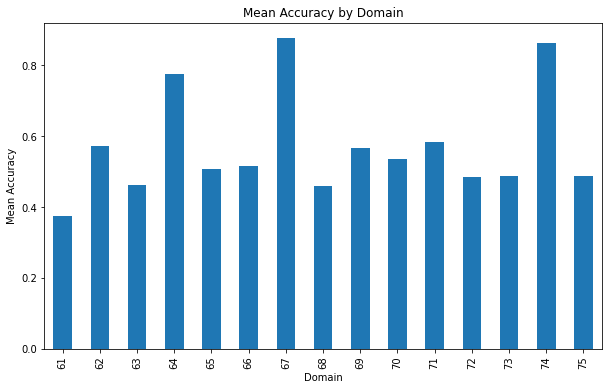

Worst n domains with their accuracies:
domain
61    0.376184
68    0.459103
63    0.462585
72    0.485632
75    0.487179
73    0.488506
65    0.509116
66    0.516224
70    0.534776
69    0.567055
Name: accuracy, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results_wal/mobiact_realworld_Syn.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)

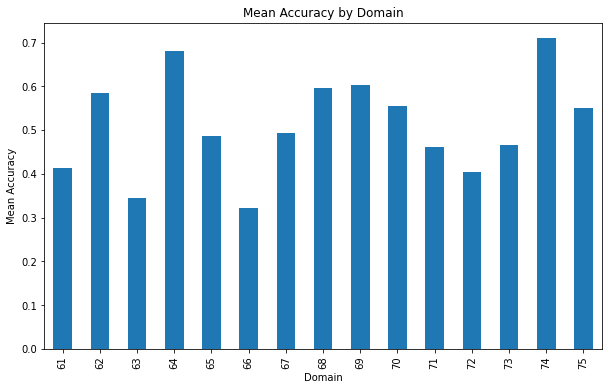

Worst n domains with their accuracies:
domain
66    0.322980
63    0.344005
72    0.404439
61    0.413099
71    0.461593
73    0.467117
65    0.485595
67    0.494580
75    0.550304
70    0.555118
Name: accuracy, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results_wal/mobiact_realworld_Df.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)

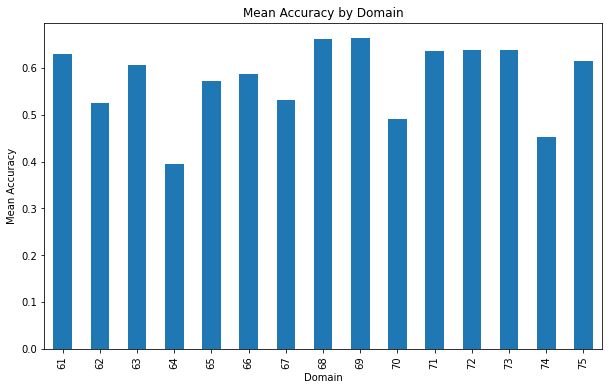

Worst n domains with their accuracies:
domain
64    0.394179
74    0.452753
70    0.490026
62    0.524487
67    0.531119
65    0.570952
66    0.587753
63    0.605355
75    0.615188
61    0.628538
Name: accuracy, dtype: float64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results_wal/mobiact_realworld_Df_aug.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)